In [58]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
df=sns.load_dataset("Titanic")

In [61]:
print(df.shape)
print(df.columns)

(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [62]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


In [63]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [64]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [65]:
print(df.duplicated().value_counts())

False    784
True     107
Name: count, dtype: int64


In [66]:
print(df.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [67]:
print(df["survived"].value_counts())
print(df["survived"].mean())

survived
0    549
1    342
Name: count, dtype: int64
0.3838383838383838


In [74]:
print(df.groupby("sex")["survived"].sum())
print(df.groupby("sex")["survived"].mean())

sex
female    233
male      109
Name: survived, dtype: int64
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


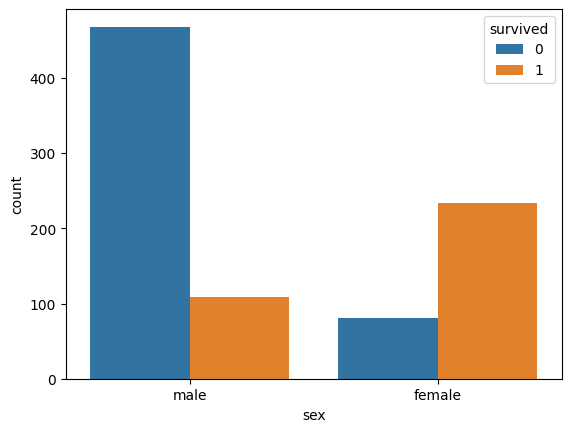

In [68]:
sns.countplot(data=df,x="sex",hue="survived")
plt.show()


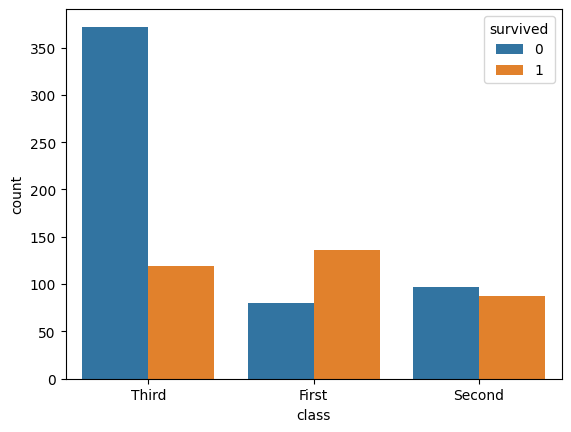

In [69]:
sns.countplot(data=df,x="class",hue="survived")
plt.show()

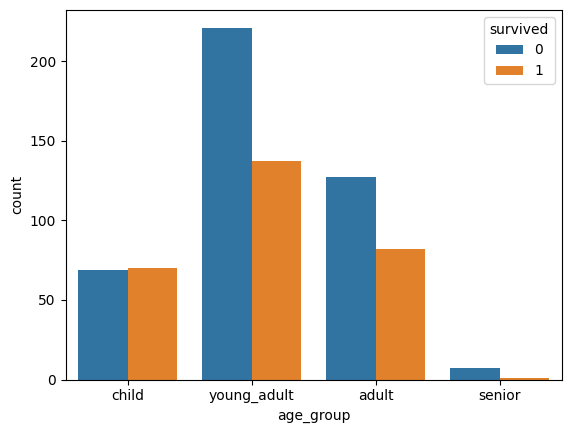

In [70]:
df["age_group"]=pd.cut(df["age"],bins=[0,18,35,65,100],labels=["child","young_adult","adult","senior"])
sns.countplot(data=df,x="age_group",hue="survived")
plt.show()

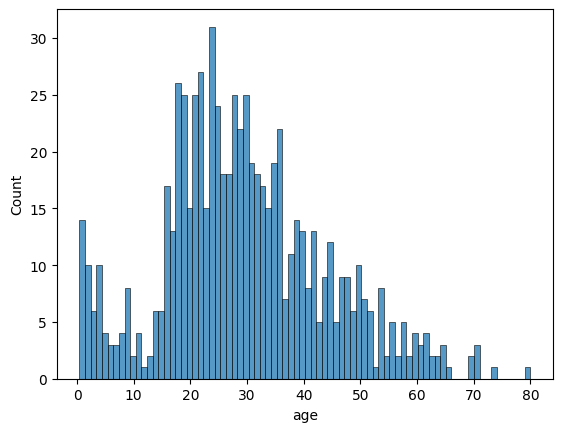

In [77]:
sns.histplot(data=df,x="age",bins=80)
plt.show()

<Axes: xlabel='sex', ylabel='count'>

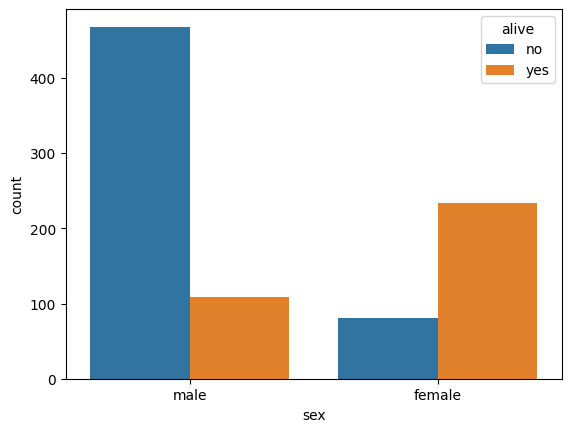

In [79]:
sns.countplot(data=df,x="sex",hue="alive")

<Axes: xlabel='sex', ylabel='age'>

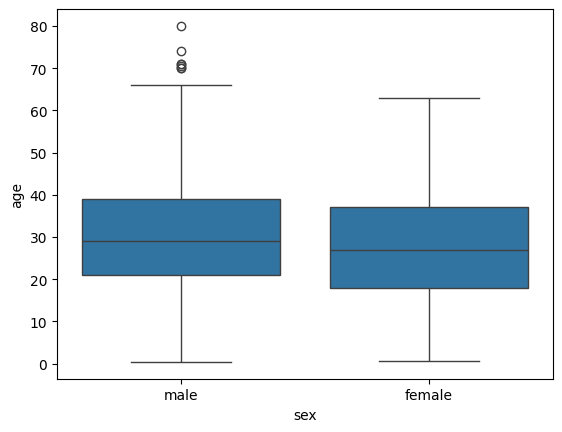

In [81]:
sns.boxplot(data=df,x="sex",y="age")

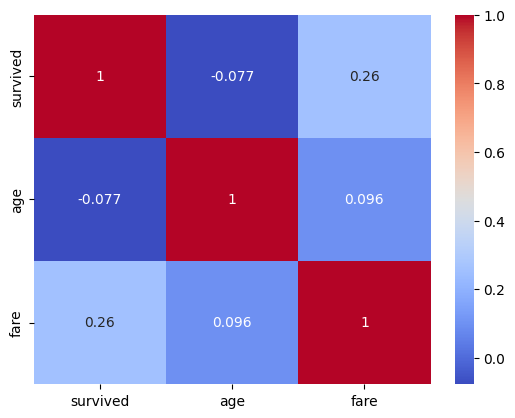

In [82]:
corr=df[["survived","age","fare"]].corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

<Axes: xlabel='survived', ylabel='family_size'>

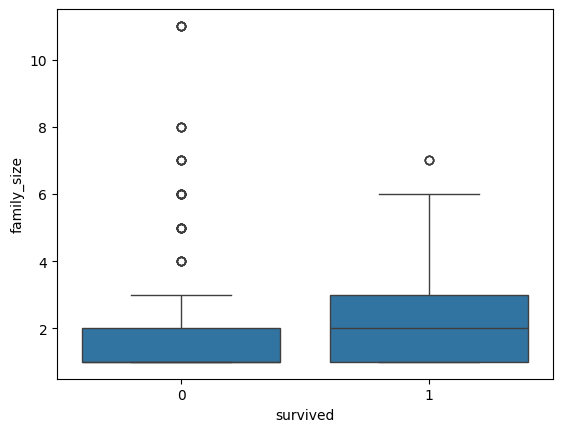

In [83]:
df["family_size"]=df["sibsp"]+df["parch"]+1
sns.boxplot(data=df,x="survived",y="family_size")

In [84]:
print(f"Overrall Survival rate:{df["survived"].mean():.2%}")
print(f"Male Survival rate:{df[df["sex"]=="male"]["survived"].mean():.2%}")
print(f"Male Survival rate:{df[df["sex"]=="female"]["survived"].mean():.2%}")

Overrall Survival rate:38.38%
Male Survival rate:18.89%
Male Survival rate:74.20%
